In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
F_s = []
acc_s = []

with open('mnist_sgd_0.3_rand_nw_best_f_l2_w.txt', 'r') as f:
    text = f.read()
    for line in text.split('\n'):
        if 'F_all' in line:
            F_s.append(line)
        elif 'Acc' in line:
            acc_s.append(line)

In [117]:
# parse accuracies

for i in range(len(acc_s)):
    acc_s[i] = acc_s[i][15:]

print(acc_s)

history = []
for i in range(len(acc_s)):
    new_sub_list = []
    sub_list = acc_s[i].split(' ')
    for elem in sub_list:
        if len(elem) > 1:
            new_sub_list.append(float(elem))
    history.append(np.asarray(new_sub_list))

history = np.asarray(history)
#history

means = []
stds = []
for run in history:
    means.append(np.mean(run))
    stds.append(np.std(run))

means = np.asarray(means)
stds = np.asarray(stds)

means = means[means > 0.5]
stds = stds[means > 0.5]

['0.735 0.735 0.735 0.735 0.735 0.735 0.735 0.735 0.735 0.735 0.735 0.735', '0.7492 0.7493 0.7493 0.7493 0.7493 0.7493 0.7493 0.7493 0.7493 0.7493', '0.7722 0.7729 0.7729 0.7729 0.7729 0.7729 0.7729 0.7729 0.7729 0.7729', '0.7561 0.7574 0.7572 0.7572 0.7572 0.7572 0.7572 0.7572 0.7572 0.7572', '0.7535 0.7543 0.7546 0.7546 0.7546 0.7546 0.7546 0.7546 0.7546 0.7546', '0.718  0.7231 0.7232 0.7232 0.7232 0.7232 0.7232 0.7232 0.7232 0.7232', '0.7541 0.7577 0.7576 0.7576 0.7576 0.7576 0.7576 0.7576 0.7576 0.7576', '0.723  0.732  0.7321 0.7321 0.7321 0.7321 0.7321 0.7321 0.7321 0.7321', '0.7424 0.7462 0.7467 0.7467 0.7467 0.7467 0.7467 0.7467 0.7467 0.7467', '0.7405 0.7478 0.7488 0.7488 0.7488 0.7488 0.7488 0.7488 0.7488 0.7488', '0.7479 0.7532 0.7534 0.7535 0.7535 0.7535 0.7535 0.7535 0.7535 0.7535', '0.7297 0.7394 0.7412 0.7414 0.7414 0.7414 0.7414 0.7414 0.7414 0.7414', '0.7371 0.7469 0.7487 0.7488 0.7488 0.7488 0.7488 0.7488 0.7488 0.7488', '0.7573 0.7639 0.7643 0.7642 0.7643 0.7643 0.764

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [118]:
# parse losses

for i in range(len(F_s)):
    F_s[i] = F_s[i][15:]



history_f = []
for i in range(len(F_s)):
    new_sub_list = []
    sub_list = F_s[i].split(' ')
    for elem in sub_list:
        if len(elem) > 1:
            new_sub_list.append(float(elem))
    history_f.append(np.asarray(new_sub_list))

history_f = np.asarray(history_f)
#history_f

means_f = []
stds_f = []

for run in history_f:
    means_f.append(np.mean(run))
    stds_f.append(np.std(run))

means_f = np.asarray(means_f)
stds_f = np.asarray(stds_f)

means_f = means_f[means_f > 0.1]
stds_f = stds_f[means_f > 0.1]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


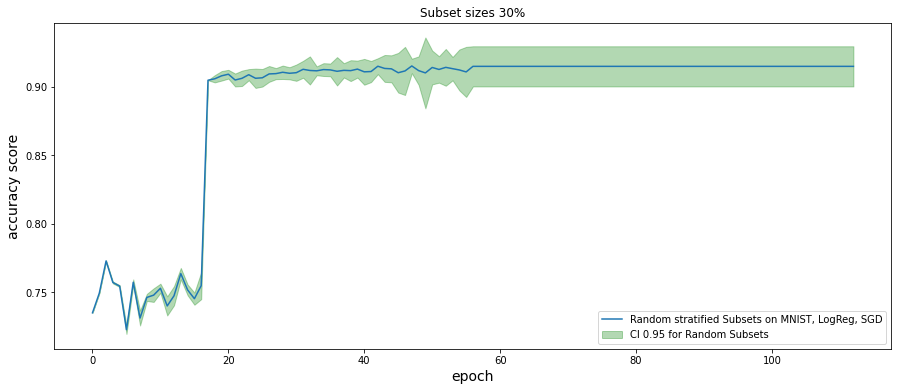

In [119]:


plt.figure(figsize = (15,6))
arg = np.arange(len(means))
plt.plot(arg, means,label = 'Random stratified Subsets on MNIST, LogReg, SGD')
plt.fill_between(arg,
                 means - 2*stds,
                 means + 2*stds,
                 color = 'green',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets')



plt.xlabel('epoch', fontsize = 14)
plt.ylabel('accuracy score', fontsize = 14)
plt.legend(loc = 'lower right')
plt.title('Subset sizes 30%');



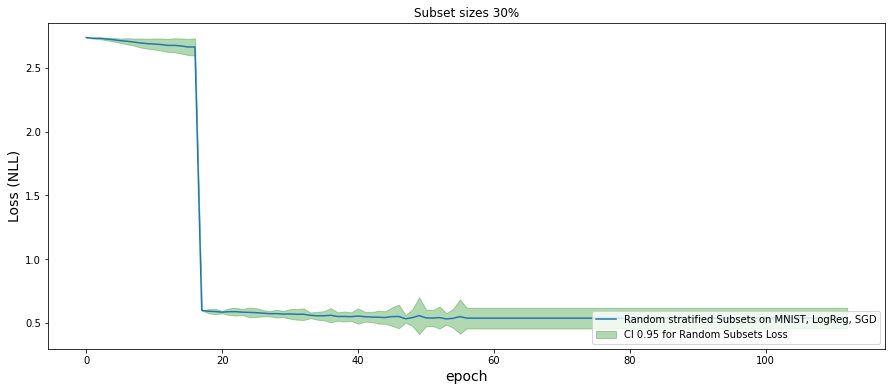

In [120]:
plt.figure(figsize = (15,6))
arg = np.arange(len(means_f))
plt.plot(arg, means_f,label = 'Random stratified Subsets on MNIST, LogReg, SGD')
plt.fill_between(arg,
                 means_f - 2*stds_f,
                 means_f + 2*stds_f,
                 color = 'green',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets Loss')



plt.xlabel('epoch', fontsize = 14)
plt.ylabel('Loss (NLL)', fontsize = 14)
plt.legend(loc = 'lower right')
plt.title('Subset sizes 30%');



In [ ]:
######################

In [122]:
F_g = []
acc_g = []

with open('mnist_sgd_0.3_grd_rand_best_acc_l2_w.txt', 'r') as f:
    text = f.read()
    for line in text.split('\n'):
        if 'F_all' in line:
            F_g.append(line)
        elif 'Acc' in line:
            acc_g.append(line)

In [123]:
# parse accuracies

for i in range(len(acc_g)):
    acc_g[i] = acc_g[i][17:]

print(acc_g)

history_g = []
for i in range(len(acc_g)):
    new_sub_list = []
    sub_list = acc_g[i].split(' ')
    for elem in sub_list:
        if len(elem) > 1:
            new_sub_list.append(float(elem))
    history_g.append(np.asarray(new_sub_list))

history_g = np.asarray(history_g)
#history

means_g = []
stds_g = []
for run in history_g:
    means_g.append(np.mean(run))
    stds_g.append(np.std(run))

means_g = np.asarray(means_g)
stds_g = np.asarray(stds_g)

means_g = means_g[means_g > 0.5]
stds_g = stds_g[means_g > 0.5]

['0.8095 0.8095 0.8095 0.8095 0.8095 0.8095 0.8095 0.8095 0.8095 0.8095', '0.8089 0.8109 0.811  0.811  0.811  0.811  0.811  0.811  0.811  0.811', '0.8209 0.8222 0.8221 0.8221 0.8221 0.8221 0.8221 0.8221 0.8221 0.8221', '0.8194 0.8209 0.8208 0.8209 0.8209 0.8209 0.8209 0.8209 0.8209 0.8209', '0.8117 0.8201 0.8212 0.8211 0.8211 0.8211 0.8211 0.8211 0.8211 0.8211', '0.9022 0.9022 0.9022 0.9022 0.9022 0.9022 0.9022 0.9022 0.9022 0.9022', '0.8796 0.9079 0.9077 0.9077 0.9077 0.9077 0.9077 0.9077 0.9077 0.9077', '0.8935 0.9093 0.9092 0.9092 0.9092 0.9092 0.9092 0.9092 0.9092 0.9092', '0.9011 0.9126 0.913  0.913  0.913  0.913  0.913  0.913  0.913  0.913', '0.8943 0.9124 0.9122 0.9121 0.9121 0.9121 0.9121 0.9121 0.9121 0.9121', '0.8933 0.9115 0.9138 0.9135 0.9134 0.9134 0.9134 0.9134 0.9134 0.9134', '0.8868 0.9054 0.913  0.9134 0.9138 0.9137 0.9137 0.9137 0.9137 0.9137', '0.8868 0.9054 0.913  0.9134 0.9138 0.9137 0.9137 0.9137 0.9137 0.9137', '0.8868 0.9054 0.913  0.9134 0.9138 0.9137 0.9137 0.

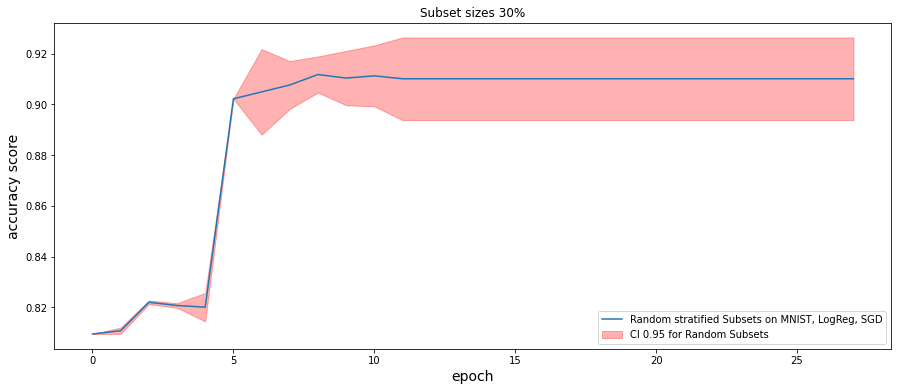

In [124]:

plt.figure(figsize = (15,6))
arg = np.arange(len(means_g))
plt.plot(arg, means_g,label = 'Random stratified Subsets on MNIST, LogReg, SGD')
plt.fill_between(arg,
                 means_g - 2*stds_g,
                 means_g + 2*stds_g,
                 color = 'red',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets')



plt.xlabel('epoch', fontsize = 14)
plt.ylabel('accuracy score', fontsize = 14)
plt.legend(loc = 'lower right')
plt.title('Subset sizes 30%');



In [132]:
# parse losses

for i in range(len(F_g)):
    F_g[i] = F_g[i][17:]



history_g = []
for i in range(len(F_g)):
    new_sub_list = []
    sub_list = F_g[i].split(' ')
    for elem in sub_list:
        if len(elem) > 1:
            new_sub_list.append(float(elem))
    history_g.append(np.asarray(new_sub_list))

history_g = np.asarray(history_g)
#history_f

means_g = []
stds_g = []

for run in history_g:
    means_g.append(np.mean(run))
    stds_g.append(np.std(run))

means_g = np.asarray(means_g)
stds_g = np.asarray(stds_g)

means_g = means_g[means_g > 0.1]
stds_g = stds_g[means_g > 0.1]

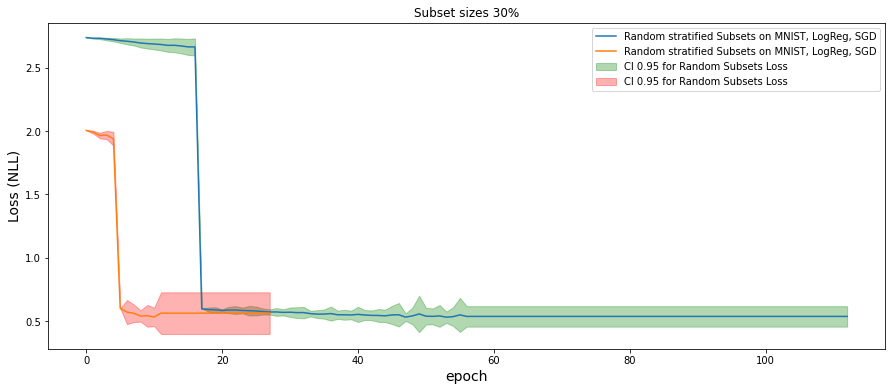

In [134]:
plt.figure(figsize = (15,6))
arg = np.arange(len(means_f))

plt.plot(arg, means_f,label = 'Random stratified Subsets on MNIST, LogReg, SGD')
plt.fill_between(arg,
                 means_f - 2*stds_f,
                 means_f + 2*stds_f,
                 color = 'green',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets Loss')

plt.plot(arg[:len(means_g)], means_g,label = 'Random stratified Subsets on MNIST, LogReg, SGD')
plt.fill_between(arg[:len(means_g)],
                 means_g - 2*stds_g,
                 means_g + 2*stds_g,
                 color = 'red',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets Loss')



plt.xlabel('epoch', fontsize = 14)
plt.ylabel('Loss (NLL)', fontsize = 14)
plt.legend(loc = 'upper right')
plt.title('Subset sizes 30%');


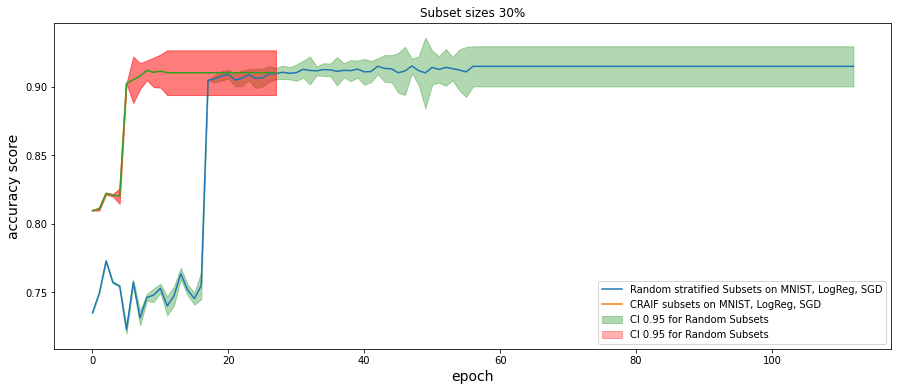

In [129]:


plt.figure(figsize = (15,6))
arg = np.arange(len(means))
plt.plot(arg, means,label = 'Random stratified Subsets on MNIST, LogReg, SGD')
plt.fill_between(arg,
                 means - 2*stds,
                 means + 2*stds,
                 color = 'green',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets')

plt.plot(arg[:len(means_g)], means_g,label = 'CRAIF subsets on MNIST, LogReg, SGD')
plt.fill_between(arg[:len(means_g)],
                 means_g - 2*stds_g,
                 means_g + 2*stds_g,
                 color = 'red',
                 alpha = 0.3,
                 label = 'CI 0.95 for Random Subsets')



plt.xlabel('epoch', fontsize = 14)
plt.ylabel('accuracy score', fontsize = 14)
plt.legend(loc = 'lower right')
plt.title('Subset sizes 30%');



plt.plot(arg[:len(means_g)], means_g,label = 'CRAIG subsets on MNIST, LogReg, SGD')
plt.fill_between(arg[:len(means_g)],
                 means_g - 2*stds_g,
                 means_g + 2*stds_g,
                 color = 'red',
                 alpha = 0.3,
                 label = 'CI 0.95 for CRAIG')

